In [ ]:
# ## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-z7kw0w1k
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-z7kw0w1k
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-s__9byya/pyfolio_6d2319e5b9b7494d83142151f8b729f2
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-s__9byya/pyfolio_6d2319e5b9b7494d83142151f8b729f2
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-s__9byya/elegantrl_e2277e5d351e4c9fa1ee96dcc62c0439
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-s__9byya/elegantrl_e2277e5d351e4c9fa1ee96dcc62c0439


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.apps import config
from finrl.neo_finrl.preprocessor.yahoodownloader import YahooDownloader
from finrl.neo_finrl.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.neo_finrl.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.drl_agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

In [ ]:
import os
if not os.path.exists("./" + config.DATA_SAVE_DIR):
    os.makedirs("./" + config.DATA_SAVE_DIR)
if not os.path.exists("./" + config.TRAINED_MODEL_DIR):
    os.makedirs("./" + config.TRAINED_MODEL_DIR)
if not os.path.exists("./" + config.TENSORBOARD_LOG_DIR):
    os.makedirs("./" + config.TENSORBOARD_LOG_DIR)
if not os.path.exists("./" + config.RESULTS_DIR):
    os.makedirs("./" + config.RESULTS_DIR)

In [ ]:
# from config.py start_date is a string
config.START_DATE

'2009-01-01'

In [ ]:
config.END_DATE

'2021-10-31'

In [ ]:
IBEX_35 = ["COL.MC","CLNX.MC","MRL.MC","VIS.MC","PHM.MC","SGRE.MC","AMS.MC","FER.MC","ACS.MC","MAP.MC","MTS.MC","SAB.MC","GRF.MC","ENG.MC","ELE.MC","IBE.MC","ITX.MC","CABK.MC","ACX.MC","AENA.MC","REE.MC","SAN.MC","ANA.MC","BKT.MC","FDR.MC","MEL.MC","IAG.MC","BBVA.MC","TEF.MC","NTGY.MC"]
print(IBEX_35)

['COL.MC', 'CLNX.MC', 'MRL.MC', 'VIS.MC', 'PHM.MC', 'SGRE.MC', 'AMS.MC', 'FER.MC', 'ACS.MC', 'MAP.MC', 'MTS.MC', 'SAB.MC', 'GRF.MC', 'ENG.MC', 'ELE.MC', 'IBE.MC', 'ITX.MC', 'CABK.MC', 'ACX.MC', 'AENA.MC', 'REE.MC', 'SAN.MC', 'ANA.MC', 'BKT.MC', 'FDR.MC', 'MEL.MC', 'IAG.MC', 'BBVA.MC', 'TEF.MC', 'NTGY.MC']


In [ ]:
df = YahooDownloader(start_date = '2009-01-01',
                     end_date = '2021-10-14',
                     ticker_list = IBEX_35).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,32.990002,33.700001,32.990002,15.898987,732696.0,ACS.MC,4
1,2009-01-02,11.370000,11.950000,11.370000,6.227796,768565.0,ACX.MC,4
2,2009-01-02,88.599998,92.150002,88.599998,54.755966,141137.0,ANA.MC,4
3,2009-01-02,8.320043,8.723555,8.320043,4.605252,31465447.0,BBVA.MC,4
4,2009-01-02,3.988073,4.088396,3.988073,2.548610,740746.0,BKT.MC,4


In [ ]:
df.tail()

,date,open,high,low,close,volume,tic,day
92623,2021-10-13,0.710000,0.714200,0.662000,0.666600,49535977.0,SAB.MC,2
92624,2021-10-13,3.361000,3.378500,3.260500,3.227566,39017776.0,SAN.MC,2
92625,2021-10-13,20.459999,21.290001,20.280001,21.049999,2237096.0,SGRE.MC,2
92626,2021-10-13,4.009500,4.012500,3.961000,3.967000,21103501.0,TEF.MC,2
92627,2021-10-13,55.200001,56.049999,54.599998,55.900002,54020.0,VIS.MC,2


In [ ]:
df.shape

(92628, 8)

In [ ]:
df.sort_values(['date','tic']).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,32.990002,33.700001,32.990002,15.898987,732696.0,ACS.MC,4
1,2009-01-02,11.370000,11.950000,11.370000,6.227796,768565.0,ACX.MC,4
2,2009-01-02,88.599998,92.150002,88.599998,54.755966,141137.0,ANA.MC,4
3,2009-01-02,8.320043,8.723555,8.320043,4.605252,31465447.0,BBVA.MC,4
4,2009-01-02,3.988073,4.088396,3.988073,2.548610,740746.0,BKT.MC,4


In [ ]:
len(df.tic.unique())#FALTAN 5

30

In [ ]:
df.tic.value_counts()

CABK.MC    3269
MEL.MC     3269
MAP.MC     3269
FER.MC     3269
SAB.MC     3269
PHM.MC     3269
ENG.MC     3269
NTGY.MC    3269
VIS.MC     3269
ITX.MC     3269
COL.MC     3269
SGRE.MC    3269
ELE.MC     3269
ACX.MC     3269
BBVA.MC    3269
SAN.MC     3269
IBE.MC     3269
REE.MC     3269
BKT.MC     3269
FDR.MC     3269
ANA.MC     3269
MTS.MC     3269
ACS.MC     3269
GRF.MC     3269
TEF.MC     3269
AMS.MC     2934
IAG.MC     2744
MRL.MC     1867
AENA.MC    1708
CLNX.MC    1650
Name: tic, dtype: int64

In [ ]:
df.sample(5)

,date,open,high,low,close,volume,tic,day
4872,2009-10-06,14.690000,14.940000,14.530000,11.401623,2241189.0,SGRE.MC,1
33128,2013-12-02,1.502055,1.505207,1.468956,1.197227,13153446.0,SAB.MC,0
30963,2013-08-12,7.080000,7.120000,7.025000,6.660301,404581.0,MEL.MC,0
15648,2011-05-26,8.650000,8.739000,8.510000,5.403729,2263438.0,FER.MC,3
83557,2020-08-11,3.600000,3.908000,3.598000,3.898000,2481091.0,MEL.MC,1


In [ ]:
df.describe()

,open,high,low,close,volume,day
count,92628.000000,92628.000000,92628.000000,92628.000000,9.262800e+04,92628.000000
mean,19.833066,20.071526,19.569526,16.616354,1.047040e+07,1.995423
std,24.539437,24.813585,24.240792,22.175215,2.820037e+07,1.408124
min,0.252000,0.262000,0.250000,0.254600,0.000000e+00,0.000000
25%,5.830000,5.908000,5.732375,4.398594,5.735188e+05,1.000000
50%,12.100000,12.234418,11.950000,8.617808,1.644242e+06,2.000000
75%,23.240000,23.500000,22.959999,19.634623,6.464110e+06,3.000000
max,183.000000,184.899994,182.699997,166.293732,9.487686e+08,4.000000


In [ ]:
df.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume    float64
tic        object
day         int64
dtype: object

In [ ]:
tech_indicators = ['macd',
 'rsi_30',
 'cci_30'
 #'dx_30'
 ]

In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicators,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)

Successfully added technical indicators
Successfully added turbulence index


In [ ]:
processed.sample(10)

,date,open,high,low,close,volume,tic,day,macd,rsi_30,cci_30,turbulence
32764,2014-02-17,3.084000,3.095000,3.041000,1.921711,6085468.0,MAP.MC,0,-0.020066,48.857898,-69.747397,8.625984
10257,2010-08-12,19.059999,19.125000,18.855000,5.391722,213887.0,ELE.MC,3,0.083503,51.601986,33.304647,18.367507
9094,2010-06-08,8.000000,8.000000,7.800000,4.113571,4979132.0,REE.MC,1,-0.129801,39.451703,-77.918051,23.811800
42403,2015-08-24,8.100000,8.192000,7.695000,5.897996,86477991.0,BBVA.MC,0,-0.142013,34.221143,-386.382782,63.450064
70080,2019-12-19,2.812000,2.864000,2.810000,2.721739,23071138.0,CABK.MC,3,0.044884,61.154897,188.279398,62.786814
15397,2011-06-01,6.596000,6.660000,6.464000,5.066012,2831484.0,SGRE.MC,2,-0.005233,51.396462,107.969703,13.486245
47690,2016-06-20,10.610000,10.760000,10.575000,10.163074,442009.0,MEL.MC,0,-0.101375,49.968681,-29.063282,65.272060
26038,2013-01-28,21.600000,21.600000,20.959999,17.739254,4632750.0,ITX.MC,0,0.096499,52.604462,-11.845291,12.512199
4195,2009-08-28,3.088162,3.138545,3.088162,2.177485,4124266.0,SAB.MC,4,0.069440,70.783728,145.121392,0.000000
17037,2011-09-01,5.156000,5.196000,5.040000,3.133682,23705685.0,IBE.MC,3,-0.065656,44.346480,-31.001020,20.220938


In [ ]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(tech_indicators)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 25, State Space: 126


In [ ]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 100000, 
    "buy_cost_pct": 0.0001, 
    "sell_cost_pct": 0.0001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": tech_indicators,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5
    
}

In [ ]:
rebalance_window = 63 # rebalance_window is the number of days to retrain the model
validation_window = 63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2009-01-01'
train_end = '2019-01-01'
val_test_start = '2019-01-01'
val_test_end = '2021-09-15'

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [ ]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.01,
                    'learning_rate': 0.0005
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2048,
                    "learning_rate": 0.00025,
                    "batch_size": 64
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 100_000,
                      "learning_rate": 0.000005,
                      "batch_size": 64
                    }


timesteps_dict = {'a2c' : 10_000, 
                 'ppo' : 10_000, 
                 'ddpg' : 10_000
                 }

In [ ]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs,
                                                 PPO_model_kwargs,
                                                 DDPG_model_kwargs,
                                                 timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  134.26020556361587
======Model training from:  2009-01-01 to  2019-01-02
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0005}
Using cpu device
Logging to tensorboard_log/a2c/a2c_126_3
---------------------------------------
| time/                 |             |
|    fps                | 108         |
|    iterations         | 100         |
|    time_elapsed       | 4           |
|    total_timesteps    | 500         |
| train/                |             |
|    entropy_loss       | -35.6       |
|    explained_variance | -2.4        |
|    learning_rate      | 0.0005      |
|    n_updates          | 99          |
|    policy_loss        | -0.32       |
|    reward             | 0.010714235 |
|    std                | 1           |
|    value_loss         | 0.0893      |
---------------------------------------
----------------------------------------
| time/                 |       

In [ ]:
df_summary

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,126,2019-01-02,2019-04-01,DDPG,0.386293,0.443865,0.58528
1,189,2019-04-01,2019-07-02,PPO,-0.253618,-0.0289414,-0.134736
2,252,2019-07-02,2019-09-27,A2C,0.0517625,-0.0188462,-0.0721404
3,315,2019-09-27,2019-12-25,A2C,0.628377,0.468312,0.411067
4,378,2019-12-25,2020-03-25,DDPG,-0.37494,-0.350372,-0.298546
5,441,2020-03-25,2020-06-25,A2C,0.217638,0.161293,0.0744706
6,504,2020-06-25,2020-09-22,A2C,0.0745039,0.00746475,-0.279542
7,567,2020-09-22,2020-12-18,DDPG,0.19933,0.077565,0.277907
8,630,2020-12-18,2021-03-19,A2C,0.490045,0.208168,0.345159
9,693,2021-03-19,2021-06-18,PPO,0.0615213,0.267874,-0.00493307


In [ ]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()

In [ ]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.6859275025206137


In [ ]:
df_account_value.head()

,account_value,date,daily_return,datadate
0,100000.000000,2019-04-01,NaN,2019-04-01
1,100401.414516,2019-04-02,0.004014,2019-04-02
2,101006.978101,2019-04-03,0.006031,2019-04-03
3,101750.777931,2019-04-04,0.007364,2019-04-04
4,101464.208392,2019-04-05,-0.002816,2019-04-05


In [ ]:
df_account_value.tail()

,account_value,date,daily_return,datadate
625,134904.351271,2021-09-08,-0.004302,2021-09-08
626,134198.172080,2021-09-09,-0.005235,2021-09-09
627,132859.231461,2021-09-10,-0.009977,2021-09-10
628,134487.836441,2021-09-13,0.012258,2021-09-13
629,133348.648388,2021-09-14,-0.008471,2021-09-14


In [ ]:
#profit
df_account_value.account_value[628]-df_account_value.account_value[0]
#len(df_account_value.account_value)

34487.83644056946

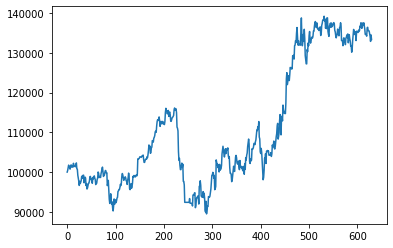

In [ ]:
%matplotlib inline
df_account_value.account_value.plot()

In [ ]:
df_account_value.to_csv(r'./ensemble_account.csv',index=False, header=True)

In [ ]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.122007
Cumulative returns     0.333486
Annual volatility      0.196118
Sharpe ratio           0.685928
Calmar ratio           0.531838
Stability              0.641886
Max drawdown          -0.229406
Omega ratio            1.133000
Sortino ratio          0.987251
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.979335
Daily value at risk   -0.024175
dtype: float64


==============Compare to IBEX===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (628, 8)


Start date,2019-04-01
End date,2021-09-14
Total months,30
,Backtest
Annual return,12.201%
Cumulative returns,33.349%
Annual volatility,19.612%
Sharpe ratio,0.69
Calmar ratio,0.53
Stability,0.64
Max drawdown,-22.941%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.94,2020-02-12,2020-05-19,2020-12-28,229
1,11.81,2019-04-30,2019-08-15,2019-10-25,129
2,8.33,2021-02-19,2021-03-08,2021-04-29,50
3,6.50,2021-04-29,2021-07-19,NaT,NaN
4,3.25,2021-02-08,2021-02-17,2021-02-19,10


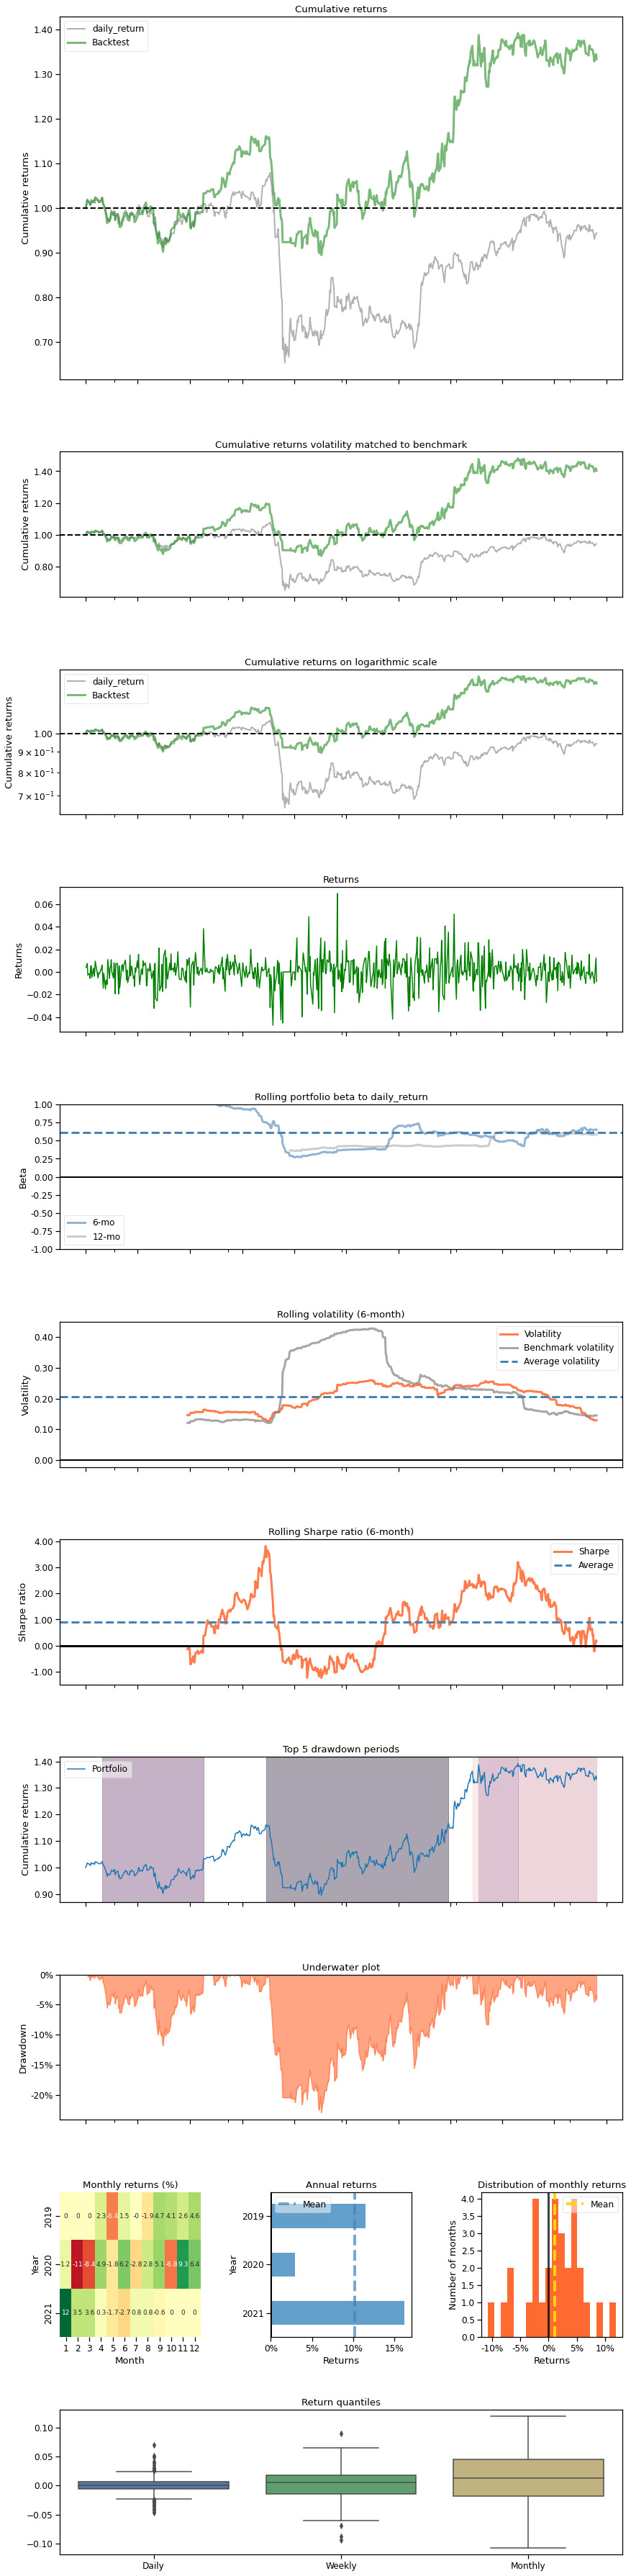

In [ ]:
print("==============Compare to IBEX===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
# he modificado esto, no tenia sentido compararlo con Dow Jones
# IBEX 35: ^IBEX
backtest_plot(df_account_value, 
             baseline_ticker = '^IBEX', 
             baseline_start = df_account_value.loc[0,'date'],
             baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

In [ ]:
a2c_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_validation_{}_{}.csv'.format('A2C',i))
    a2c_account_value = a2c_account_value.append(temp,ignore_index=True)
a2c_account_value.to_csv(r'./a2c_account.csv',index=False, header=True)

In [ ]:
ddpg_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_validation_{}_{}.csv'.format('DDPG',i))
    ddpg_account_value = ddpg_account_value.append(temp,ignore_index=True)
ddpg_account_value.to_csv(r'./ddpg_account.csv',index=False, header=True)

In [ ]:
ppo_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_validation_{}_{}.csv'.format('PPO',i))
    ppo_account_value = ppo_account_value.append(temp,ignore_index=True)
a2c_account_value.to_csv(r'./ppo_account.csv',index=False, header=True)

In [ ]:
df_a2c=pd.read_csv('a2c_account.csv')
df_ppo=pd.read_csv('ppo_account.csv')
df_ddpg=pd.read_csv('ddpg_account.csv')

In [ ]:
df_random=pd.read_csv('random_account_8.csv')

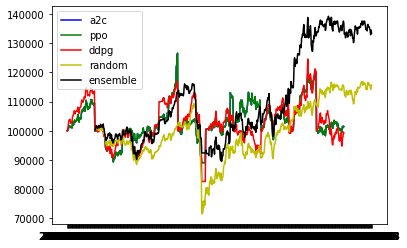

In [ ]:
%matplotlib inline
plt.plot_date(df_a2c.date, df_a2c.account_value,'b-',label='a2c')
plt.plot_date(df_ppo.date, df_ppo.account_value,'g-',label='ppo')
plt.plot_date(df_ddpg.date, df_ddpg.account_value,'r-',label='ddpg')
plt.plot_date(df_random.date, df_random.account_value,'y-',label='random')
plt.plot_date(df_account_value.date, df_account_value.account_value,'k-',label='ensemble')
plt.locator_params(axis="x", nbins=4)
plt.legend(loc="upper left")